<a href="https://colab.research.google.com/github/omniaghazy/100_projects_tensorflow/blob/main/Project_5_Custom_Loss_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a custom Mean Absolute Percentage Error (MAPE) loss function and a custom R² score metric to evaluate a regression model using TensorFlow 2.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


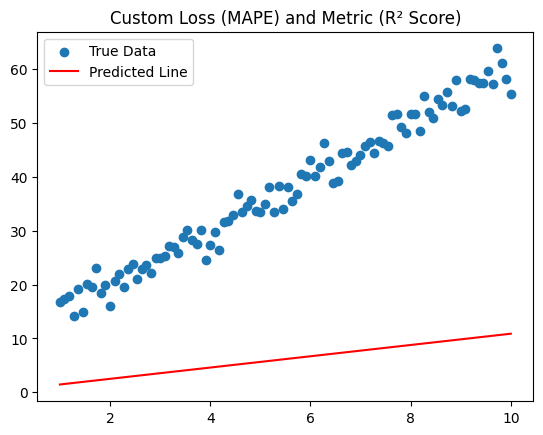

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
X = np.linspace(1, 10, 100).astype(np.float32)                 # Input values from 1 to 10
y = 5 * X + 10 + np.random.randn(*X.shape) * 2                 # Linear relation with noise

# Define a custom MAPE loss function
def custom_mape(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100  # MAPE formula

# Define a custom R² (coefficient of determination) metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))         # Residual sum of squares
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))  # Total sum of squares
    return 1 - ss_res / ss_tot                                 # R² formula

# Create a simple linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])            # Single neuron for linear regression
])

# Compile the model using custom loss and metric
model.compile(optimizer='adam', loss=custom_mape, metrics=[r2_score])

# Train the model
model.fit(X, y, epochs=100, verbose=0)                         # Train for 100 epochs silently

# Predict using the trained model
preds = model.predict(X)                                       # Make predictions on X

# Plot predictions
plt.scatter(X, y, label='True Data')                           # Scatter plot of actual data
plt.plot(X, preds, color='red', label='Predicted Line')        # Plot predicted line
plt.title("Custom Loss (MAPE) and Metric (R² Score)")
plt.legend()
plt.show()